# Primary Text Processing

## Summary

In [1]:
# Code summary of below

In [2]:
!python --version

Python 3.11.4


## Import

### Libraries

In [3]:
from backend import *
import random

In [4]:
%matplotlib inline

### Definitions

In [5]:
texts = '../texts/fiction/utf8/'

libCols = ['author','pub_year','title','text']
tokenOHCO = ['w_id','part_num','para_num', 'sent_num', 'token_num']
tokenCols = ['p_id', 'start', 'stop', 'text', 'token_id', 'head_id', 'rel', 'pos', 'lemma', 'anim', 'aspect', \
             'case', 'degree', 'gender', 'mood', 'number', 'person', 'tense', 'verb_form', 'voice']

In [6]:
#!curl --silent https://xkcd.com/color/rgb.txt | grep -E '(\w+\s?\w?\s?)(#[[:alnum:]]{6})' > xkcd_colors.txt
xkcd_colors_list = './xkcd_colors.txt'
with open(xkcd_colors_list, 'r') as f: 
    xkcd_colors = f.readlines()
xkcd_colors_dict = {}
for color in [x.split('\t') for x in xkcd_colors]:
    xkcd_colors_dict.update({color[0]:color[1]})
    
def xkcd_color_picker():
    color_id = list(xkcd_colors_dict.items())[random.randint(0, len(xkcd_colors_dict)-1)]
    return color_id

## Library

In [7]:
libDf = pd.DataFrame(columns = libCols)
for t in os.listdir(texts): 
    if t[-4:] == '.txt': 
        #print(t)
        info = re.match(r'(\w+)-(\d{4})-(.+).txt', t)
        with codecs.open(texts+t, 'r') as f: 
            textytext = f.read()
        subDf = pd.DataFrame({'author': info.group(1),'pub_year': int(info.group(2)), 'title': info.group(3), 'text': textytext}, index=[1])
        libDf = pd.concat([libDf, subDf], ignore_index=True)
        
libDf = libDf.sort_values(libCols[1:3]).reset_index().drop(['index'], axis=1)
libDf.index.name = 'w_id'
libTextsDf = libDf[[libCols[3]]]
libDf = libDf.drop(columns=[libCols[3]])
libDf

,author,pub_year,title
w_id,,,
0,gorkii,1900,troe
1,andreev,1903,zhizn-vasiliia-fiveiskogo
2,andreev,1904,gubernator
3,andreev,1905,k-zvezdam
4,andreev,1905,khristiane
5,andreev,1905,tak-bylo
6,gorkii,1906,mat
7,andreev,1906,savva-ignis-sanat
8,andreev,1907,iuda-iskariot


In [8]:
libTextsDf

,text
w_id,
0,Среди лесов Керженца рассеяно много оди...
1,*I*\n\n Над всей жизнью Василия ...
2,I \n\n \n ...
3,1\n \n Обсерват...
4,За окнами падал мокрый нояб...
5,1\n\n Стояла на площади огромная чер...
6,*I*\n\n Каждый день над рабочей слоб...
7,1\n \t \n В...
8,1\n \n Иисуса Христа много раз...


### Regularize

In [9]:
confessionTextDf = textRegularize(libTextsDf, 10)
confessionTextDf

,text,paraID
0,...Позвольте рассказать жизнь мою; врем...,1
1,"Я -- крапивник, подкидыш, незаконный че...",2
2,"У Данилы прожил я до четырёх лет, но он...",3
3,Четырёх лет взял меня к себе дьячок Лар...,4
4,"От людей в стороне стоял, жил бедно, на...",5
...,...,...
2357,Окрыляет он жизнь её величием деяний и ...,2356
2358,"-- Ты еси мой бог и творец всех богов, ...",2357
2359,-- Да не будут миру бози инии разве теб...,2358
2360,-- Тако верую и исповедую!,2359


In [10]:
dpTextDf = textRegularize(libTextsDf, 14)
dpTextDf

,chapID,para,text,paraID
0,1,1,"Народ не только сила, создающая все мат...",1
1,1,2,"Во дни своего детства, руководимый инст...",2
2,1,3,"В мифе и эпосе, как и в языке, главном ...",3
3,1,4,Что образование и построение языка -- п...,4
4,1,5,Мы еще не имеем достаточного количества...,5
...,...,...,...,...
287,12,28,"Но хулиган -- кровное дитя мещанина, эт...",266
288,12,29,Это драма -- семейная драма врага; мы с...,267
289,12,30,Нам -- это естественное желание здорово...,268
290,12,31,Ибо для нас история всемирной культуры ...,269


In [11]:
motherTextDf = textRegularize(libTextsDf, 6)
motherTextDf

,chapID,para,text,paraID
0,1,1,"Каждый день над рабочей слободкой, в ды...",1
1,1,2,"Вечером, когда садилось солнце, и на ст...",2
2,1,3,"День проглочен фабрикой, машины высосал...",3
3,1,4,"По праздникам спали часов до десяти, по...",4
4,1,5,"Усталость, накопленная годами, лишала л...",5
...,...,...,...,...
4490,58,90,Ударили по руке.,4432
4491,58,91,"-- Только злобы накопите, безумные! На ...",4433
4492,58,92,Жандарм схватил ее за горло и стал души...,4434
4493,58,93,-- Несчастные...,4435


<Axes: xlabel='chapID', ylabel='# paragraphs'>

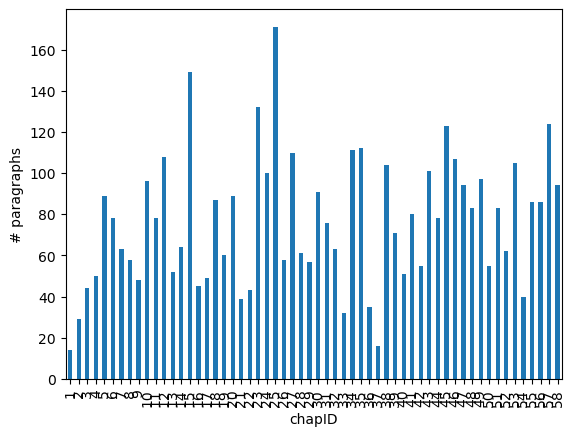

In [12]:
motherTextDf.groupby('chapID').paraID.count().to_frame().plot(kind='bar', ylabel='# paragraphs', legend=False)

In [13]:
# split into chapters
detstvoTextDf = libTextsDf.loc[[22]]
detstvoTextDf = pd.DataFrame(data=detstvoTextDf.text.str.split(r'\*\w+\*\n\n').to_list()[0]).reset_index()
detstvoTextDf = detstvoTextDf.rename(columns={'index':'chap', 0:'text'})[1:]
detstvoTextDf = detstvoTextDf.text.str.split('\n\n', expand=True).stack().to_frame().reset_index().drop('level_1', axis=1).drop([1, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], axis=0)
detstvoTextDf = detstvoTextDf.rename(columns={'level_0':'chap', 0:'text'})
detstvoTextDf = detstvoTextDf['text'].str.split(' \n', expand=True).stack().to_frame().reset_index().rename(columns={'level_0':'chapID','level_1':'para',0:'text'})
# regularize
detstvoTextDf['text'] = detstvoTextDf.text.str.replace('\n|\s{2,}', '')
# remove white space paragraphs
detstvoTextDf = detstvoTextDf.loc[~detstvoTextDf.text.str.contains(r"^\W*$", regex=True)]
#textDf['part'] = detstvoTextDf.chapID.apply(lambda x: int('1') if x < 30 else int('2'))
#textDf['chap'] = detstvoTextDf.chapID.map(textDf['chapID'].to_dict())
detstvoTextDf['para'] = detstvoTextDf['para'].apply(lambda x: x+1)
detstvoTextDf['paraID'] = range(1, len(detstvoTextDf)+1)
detstvoTextDf

,chapID,para,text,paraID
0,0,1,"В полутёмной тесной комнате, на полу, п...",1
1,0,2,"Мать, полуголая, в красной юбке, стоит ...",2
2,0,3,"Меня держит за руку бабушка -- круглая,...",3
3,0,4,"Я никогда ещё не видал, чтобы большие п...",4
4,0,5,"-- Попрощайся с тятей-то, никогда уж не...",5
...,...,...,...,...
2848,23,212,"-- Гляди, ты гляди, чего он делает! -- ...",2780
2849,23,213,"Мне понравилось это, и мы пошли в поле.",2781
2851,23,215,Через несколько дней после похорон мате...,2782
2852,23,216,"-- Ну, Лексей, ты -- не медаль, на шее ...",2783


## Words

### Tokens

In [ ]:
motherTokenDf = pd.read_pickle('./proc/MotherTokendf.pkl')#.set_index(['p_id','token_id'])

In [ ]:
motherTokenDf.set_index(['p_id','token_id'])

In [ ]:
confessionTokenDf = pd.read_pickle('./proc/ConfessionTokenDf.pkl')

In [ ]:
confessionTokenDf.set_index(['p_id', 'token_id'])

In [ ]:
childhoodTokenDf = pd.read_pickle('./proc/ChildhoodTokenDf.pkl')

In [ ]:
childhoodTokenDf.set_index(['p_id', 'token_id'])

In [ ]:
dpTokenDf = pd.read_pickle('./proc/DpTokenDf.pkl')

In [ ]:
dpTokenDf.set_index(['p_id', 'token_id'])

### Vocab

In [ ]:
motherRankDf = GetRankDf(motherTokenDf)
motherRankDf

In [ ]:
confessionRankDf = GetRankDf(confessionTokenDf)
confessionRankDf

In [ ]:
childhoodRankDf = GetRankDf(childhoodTokenDf)
childhoodRankDf

In [ ]:
dpRankDf = GetRankDf(dpTokenDf)
dpRankDf

In [ ]:
def arrangeFigures(*figures):
    fig, ax = plt.subplots(1,2)
    sns.plotType(someData, ax=ax[0])  # plot1
    sns.plotType(someData, ax=ax[1])  # plot2
    fig.show()

### Time-Token Matrices (TTM)

In [ ]:
def makeBOW(tokenDf):
    bowDf = tokenDf.groupby(['p_id', 'lemma']).lemma.count().to_frame('n')
    return bowDf

def makeDTCM(bowDf):
    dtcmDf = bowDf.n.unstack(fill_value=0)
    return dtcmDf

def makeTTM(tokenDf):
    TTM = pd.get_dummies(tokenDf['lemma'], columns=['lemma'], prefix_sep='', drop_first=False).reset_index(drop=True).iloc[:,1:]
    TTM.index.name = 'time_id'
    TTM = TTM.astype('int')
    return TTM

def getVocabTTM(TTM, vocab_words):
    cfg = {'figsize': (20,6)}
    num_words = len(vocab_words)
    fig, axs = plt.subplots(num_words, sharex=True, sharey=True, **cfg)
    fig.suptitle('Appearance of vocab in Mother')
    for i in range(0, num_words):
        graph_color = xkcd_color_picker()[1]
        axs[i].plot(TTM[vocab_words[i]], graph_color)
        axs[i].set_title(vocab_words[i], color=graph_color, rotation='vertical',x=-0.01,y=0.3)
    for ax in axs:
        ax.set_yticks([])

In [ ]:
ttmwords = ['мать', 'павел', 'христос']
motherTTM = makeTTM(motherTokenDf)
getVocabTTM(motherTTM, ttmwords)

## Vectorization

### TFIDF

In [ ]:
motherRankDf, confessionRankDf, childhoodRankDf, dpRankDf

In [ ]:
motherChapParaDict = dict(zip(motherTextDf.paraID, motherTextDf.chapID))

In [ ]:
motherTokenDf = motherTokenDf.reset_index().drop('index', axis=1)
motherTokenDf['c_id'] = motherTokenDf.p_id.apply(lambda x: motherChapParaDict.get(x))
motherTokenDf

In [ ]:
motherBOW = motherTokenDf.groupby(['c_id', 'lemma']).lemma.count().to_frame('n')
motherDTCM = motherBOW.n.unstack(fill_value=0)

motherTF = motherDTCM.T / motherDTCM.T.sum()
motherTF = motherTF.transpose()

motherDF = motherDTCM.astype('bool').sum()
motherN = motherDTCM.shape[0]
motherIDF = np.log2(motherN / motherDF)

motherTFIDF = motherTF * motherIDF

motherRankDf['df'] = motherDF
motherRankDf['idf'] = motherIDF

motherBOW['tf'] = motherTF.stack()
motherBOW['tfidf'] = motherTFIDF.stack()
motherBOW.sort_values('tfidf', ascending=False)[:20]

In [ ]:
motherDTCM = motherBOW.n.unstack(fill_value=0)
MothermotherTF = motherDTCM.T / motherDTCM.T.sum()
motherTF = motherTF.transpose()
motherDF = motherDTCM.astype('bool').sum()
motherN = motherDTCM.shape[0]
motherIDF = np.log2(motherN / motherDF)
motherTFIDF = motherTF * motherIDF

In [ ]:
motherRankDf['df'] = motherDF
motherRankDf['idf'] = motherIDF

In [ ]:
motherRankDf

In [ ]:
motherBOW['tf'] = motherTF.stack()
motherBOW['tfidf'] = motherTFIDF.stack()
motherBOW.sort_values('tfidf', ascending=False)[:20]

In [ ]:
IDF = makeDTCM(makeBOW(childhoodTokenDf)).astype('bool').sum()
TF = makeBOW(childhoodTokenDf).groupby('p_id').apply(lambda x: x.n / x.n.sum())
TFIDF = TF * IDF
TFIDF = TFIDF.to_frame()

In [ ]:
TFIDF

## Vector Space

In [ ]:
fasttext_model_loc = './models/cc.ru.300.bin'
ft = fasttext.load_model(fasttext_model_loc)
ft.get_dimension()

In [ ]:
motherModel = fasttext.train_unsupervised('./models/gorkii-1906-mother.txt', model='skipgram')

## Primary Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
import plotly_express as px
import seaborn as sns

sns.set(style='ticks')

In [ ]:
libDf

In [ ]:
motherTokenDf['w_id'] = 6
confessionTokenDf['w_id'] = 10
tokensDf = pd.concat([confessionTokenDf, motherTokenDf]).set_index('w_id')

In [ ]:
tokensDf

In [ ]:
import sklearn
from sklearn.decomposition import PCA
pca_engine = PCA(n_components=10)

DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_id')

def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VSHORT)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)

vis_pcs(DCM, 0, 1)

In [ ]:
pca_engine = PCA(n_components=10)

DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_id')

def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VSHORT)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)

In [ ]:
from navec import Navec

navec_model_loc = './models/navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
import torch
from slovnet.model.emb import NavecEmbedding

In [ ]:
emb = NavecEmbedding(navec)
input = torch.tensor([1, 2, 0])
output = emb(input)

In [ ]:
output.shape

In [ ]:
def vectorize_text(text, embeddings):
    # Simple tokenization based on spaces (for demonstration purposes)
    tokens = text.split()
    
    # Initialize an empty tensor for storing embeddings
    vector = torch.zeros(embeddings.dim)
    
    for token in tokens:
        # Add the embeddings of each token; you might want to handle OOV (out-of-vocabulary) tokens
        vector += embeddings.get_vecs_by_tokens(token.lower(), lower_case_backup=True)
    
    # Average the vectors (simple approach)
    return vector / len(tokens)

In [ ]:
data = {'text': ['Hello world', 'PyTorch vectorization example', 'Text vectorization with PyTorch']}
df = pd.DataFrame(data)

In [ ]:
# Loading GloVe embeddings
glove = GloVe(name='6B', dim=100)  # Example: 100-dimensional GloVe vectors


In [ ]:
# Apply vectorization to each row in the DataFrame
df['vector'] = df['text'].apply(lambda x: vectorize_text(x, glove))